In [89]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import struct
import os

In [90]:
training_images_directory = r"data\train-images-idx3-ubyte\train-images.idx3-ubyte"
training_labels_directory = r"data\train-labels-idx1-ubyte\train-labels.idx1-ubyte"

test_images_directory = r"data\t10k-images-idx3-ubyte\t10k-images.idx3-ubyte"
test_labels_directory = r"data\t10k-labels-idx1-ubyte\t10k-labels.idx1-ubyte"

with open(training_images_directory, 'rb') as file:
        _, train_size, _, _ = struct.unpack(">IIII", file.read(16))

with open(test_images_directory, 'rb') as file:
        _, test_size, _, _ = struct.unpack(">IIII", file.read(16))


# reshaping the data from 28x28 pixels to 784x1 pixels and normalizing it by dividing by 255
x_train = np.fromfile(training_images_directory, np.ubyte, offset=16).reshape(train_size, 784) / 255    # normalizing the data
y_train = np.fromfile(training_labels_directory, np.ubyte, offset=8)
x_test = np.fromfile(test_images_directory, np.ubyte, offset=16).reshape(test_size, 784) / 255  # normalizing the data
y_test = np.fromfile(test_labels_directory, np.ubyte, offset=8)
# Normalizing the data by dividing by 255 to avoid overflow that may occur when multiplying large numbers

In [91]:
print(F"x_train shape: {x_train.shape}")
print(F"y_train shape: {y_train.shape}")
print(F"x_test shape: {x_test.shape}")
print(F"y_test shape: {y_test.shape}")

x_train shape: (60000, 784)
y_train shape: (60000,)
x_test shape: (10000, 784)
y_test shape: (10000,)


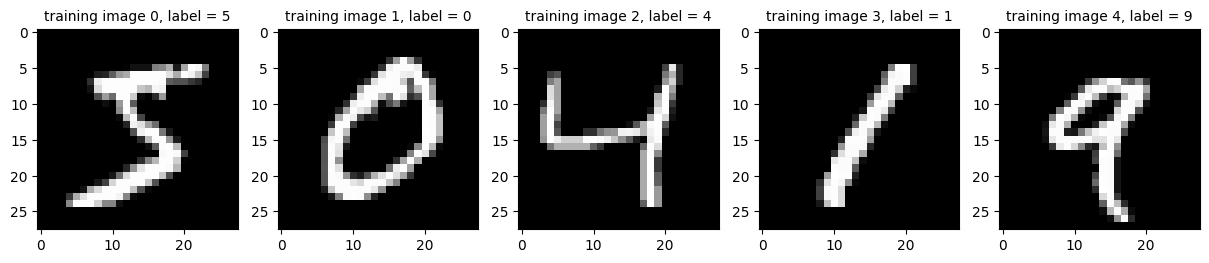

In [92]:
# reshaping the images from the training set back from 784x1 pixels to 28x28 pixels and displaying them with their labels and indexes
plt.figure(figsize=(15, 150))
for i in range(0, 5):
    plt.subplot(1, 5, i+1)
    img = x_train[i].reshape(28, 28)
    plt.imshow(img, cmap=plt.cm.gray)
    plt.title(f"training image {i}, label = {y_train[i]}", fontsize=10)
plt.show()

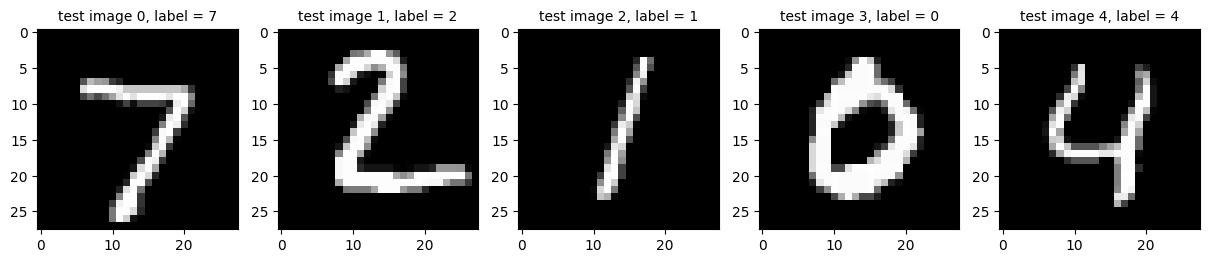

In [93]:
# reshaping the images from the test set back from 784x1 pixels to 28x28 pixels and displaying them with their labels and indexes
plt.figure(figsize=(15, 150))
for i in range(0, 5):
    plt.subplot(1, 5, i+1)
    img = x_test[i].reshape(28, 28)
    plt.imshow(img, cmap=plt.cm.gray)
    plt.title(f"test image {i}, label = {y_test[i]}", fontsize=10)
plt.show()

In [94]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (60000, 784)
y_train shape: (60000,)
x_test shape: (10000, 784)
y_test shape: (10000,)


In [95]:
mean_x_train = np.mean(x_train, axis=0)
x_train_cov_matrix = np.cov(x_train-mean_x_train,  rowvar=False)
print(f"covarience matrix shape: {x_train_cov_matrix.shape}")
train_eigenvalues, train_eigenvectors = np.linalg.eigh(x_train_cov_matrix)

covarience matrix shape: (784, 784)


In [96]:
print(f"train_eigenvalues shape: {train_eigenvalues.shape}")
print(f"train_eigenvectors shape: {train_eigenvectors.shape}")

train_eigenvalues shape: (784,)
train_eigenvectors shape: (784, 784)


In [97]:
order_of_importance = np.argsort(train_eigenvalues)[::-1]
train_eigenvalues = train_eigenvalues[order_of_importance]
train_eigenvectors = train_eigenvectors[:, order_of_importance]

train_pve = train_eigenvalues / np.sum(train_eigenvalues) # pve for each eigenvalue
train_cumulative_pve = np.cumsum(train_eigenvalues) / np.sum(train_eigenvalues) # cumulative sum of pve, it sums the pve of the eigenvalues from the first(smallest) one to the current one

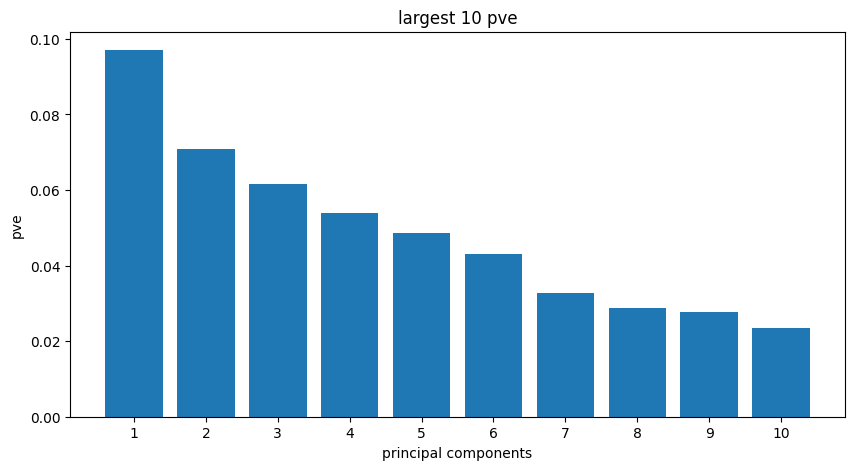

In [98]:
# plot the largest 10 pve as a bar chart
plt.figure(figsize=(10, 5))
plt.bar(np.arange(1, 11, 1), train_pve[:10])
plt.xticks(np.arange(1, 11, 1))
plt.xlabel("principal components")
plt.ylabel("pve")
plt.title("largest 10 pve")
plt.show()

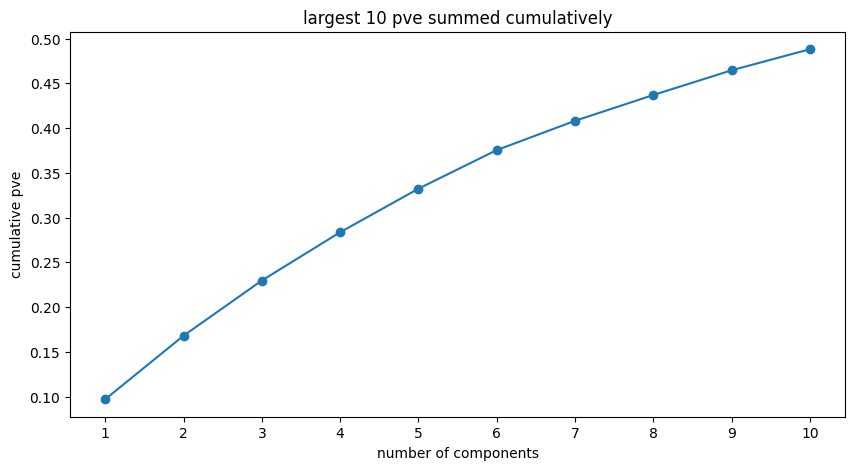

In [99]:
# plot the largest 10 pve cumulatively as a line chart
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, 11, 1), train_cumulative_pve[:10], marker='o')
plt.xticks(np.arange(1, 11, 1))
plt.xlabel("number of components")
plt.ylabel("cumulative pve")
plt.title("largest 10 pve summed cumulatively")
plt.show()

In [100]:
# print where the pve is 70%
print(f"number of principal components that should be used to explain the 70% of the data: {np.argmax(train_cumulative_pve >= 0.7)}")

number of principal components that should be used to explain the 70% of the data: 25


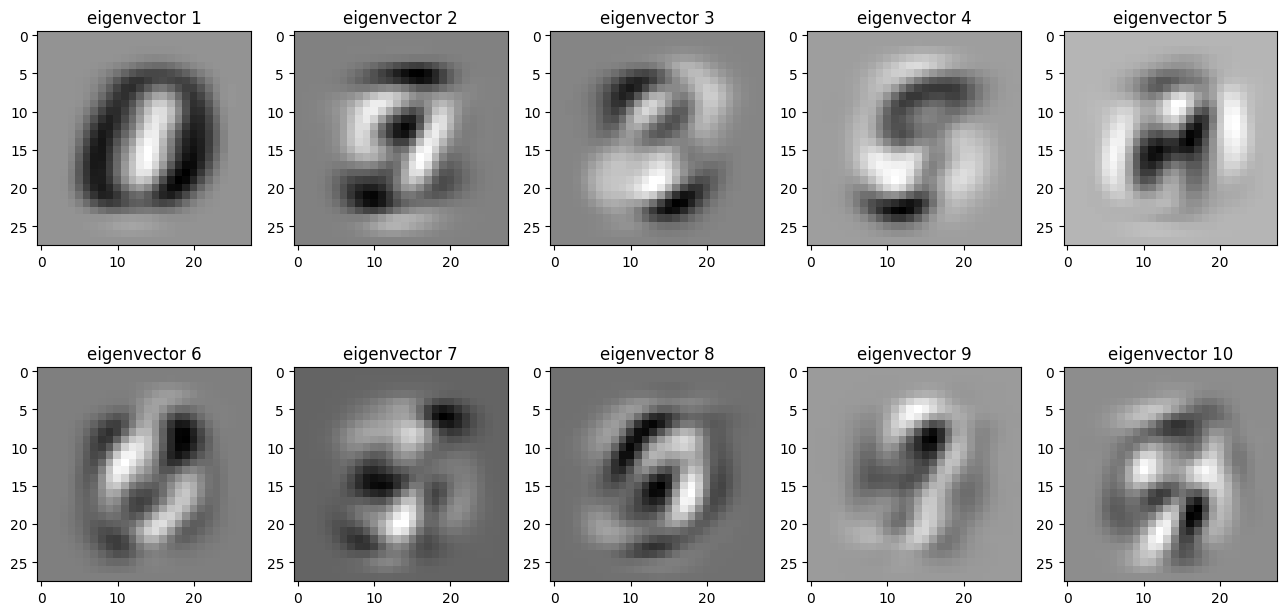

In [101]:
plt.figure(figsize=(16, 8))
for i in range(10):
    
    # min-max scale the first 10 eigenvectors
    eigenvector = train_eigenvectors[:, i]
    
    # Source: https://en.wikipedia.org/wiki/Feature_scaling
    eigenvector = (eigenvector - np.min(eigenvector)) / (np.max(eigenvector) - np.min(eigenvector))
    
    # reshape the eigenvector from 784x1 to 28x28 to be able to display it as an image
    eigenvector = eigenvector.reshape(28, 28)
    
    # display the results
    plt.subplot(2, 5, i+1)
    plt.imshow(eigenvector, cmap=plt.cm.gray)
    plt.title(f"eigenvector {i+1}")
    
plt.show()